# Maching Learning - Logistic Regression

CS440/640


<br>      This code is about how to implement Logistic Regression                                                                      



In [261]:
# Import Python libraries
import numpy as np    # numpy is the fundamental package for scientific computing with Python, such linear algebra, array...
import matplotlib.pyplot as plt      # matplotlib is a Python 2D plotting library which produces publication quality figures.

## Logistic Regression Model 


In [262]:
class LogisticRegression:
    """
    This lab implements a Logistic Regression Classifier.
    logistic regression is appropriate regression analysis to conduct when the dependent variable 
    is dichotomous (binary)
    """
    
    def __init__(self, input_dim, output_dim, hidden_dim):
        """
        Initializes the parameters of the logistic regression classifer to 
        random values.
        
        args:
            input_dim: Number of dimensions of the input data
            output_dim: Number of classes
            
        """
        ##input lauer 
        self.theta = np.random.randn(input_dim, hidden_dim) / np.sqrt(input_dim) ##random num between input and output 
        self.bias = np.zeros((1, hidden_dim)) ##matrix of zeros 1 by output dim 
        
        ##hidden layer 
        self.theta2 = np.random.randn(hidden_dim,output_dim) / np.sqrt(hidden_dim) 
        self.bias2 = np.zeros((1, output_dim))
    #--------------------------------------------------------------------------
    
    def compute_cost(self,X, y):
        """
        Computes the total cost on the dataset.
        
        args:
            X: Data array
            y: Labels corresponding to input data -- make it more user friendly 
        
        returns:
            cost: average cost per data sample
        """
        
        ##Calculating the loss as the average of the log of 
        ##the losses for each datapoint. The loss for each 
        ##individual datapoint depends only on the softmax 
        ##score for the true class, thus the multipication by 
        ##the one_hot_y vector.
        
        num_examples = np.shape(X)[0] ##returns a tuple 
        z = np.dot(X,self.theta) + self.bias ## return the dot product + the bias 
        exp_z = np.exp(z) ##calculates the slope e^x
        softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True) ##idk 
        
        one_hot_y = np.zeros((num_examples,np.max(y)+1))##idk 
        logloss = np.zeros((num_examples,))        
        for i in range(np.shape(X)[0]):
            one_hot_y[i,y[i]] = 1
            logloss[i] = -np.sum(np.log(softmax_scores[i,:]) * one_hot_y[i,:])
        data_loss = np.sum(logloss) ##sum of individuals losses 
        return 1./num_examples * data_loss

    
    #--------------------------------------------------------------------------
 
    def predict(self,X):
        """
        Makes a prediction based on current model parameters.
        
        args:
            X: Data array
            
        returns:
            predictions: array of predicted labels
        """
        # Forward propagation 
            #layer 1 
        z = np.dot(X,self.theta) + self.bias
            #exp_z = np.exp(z)
            
            ##activation function
        a_function = np.tanh(z)
            
            #layer 2 
        z1 = np.dot(a_function,self.theta2) + self.bias2
        exp_z1 = np.exp(z1)
            
            #calcualte softmax scores
            ##softmax_scores = exp_z1 / np.sum(exp_z1, axis=1, keepdims=True)
        softmax_scores = exp_z1 / (exp_z1 + 1)
#         z = np.dot(X,self.theta) + self.bias
#         exp_z = np.exp(z)
        
#         z1 = np.dot(exp_z,self.theta2) + self.bias2
#         exp_z_1 = np.exp(z1)
        
#         softmax_scores = exp_z_1 / (exp_z_1 + 1)
        predictions = np.argmax(softmax_scores, axis = 1)
        return predictions
        
    #--------------------------------------------------------------------------
    # implement logistic regression using gradient descent 
    #--------------------------------------------------------------------------
    def fit(self,X,y,num_epochs, alpha=0.01):
        '''Learns model parameters to fit the data.'''
        
        for epoch in range(0,num_epochs):
            
            # Forward propagation 
            #layer 1 
            z = np.dot(X,self.theta) + self.bias
            #exp_z = np.exp(z)
            
            ##activation function
            a_function = np.tanh(z)
            
            #layer 2 
            z1 = np.dot(a_function,self.theta2) + self.bias2
            exp_z1 = np.exp(z1)
            
            #calcualte softmax scores
            ##softmax_scores = exp_z1 / np.sum(exp_z1, axis=1, keepdims=True)
            softmax_scores = exp_z1 / (exp_z1 + 1)
            
            # Backpropagation
            beta = np.zeros_like(softmax_scores) #print (beta)
            
            one_hot_y = np.zeros_like(softmax_scores)
            
            for i in range(X.shape[0]):
                one_hot_y[i,y[i]] = 1
                
            beta = softmax_scores - one_hot_y
        
            
            # Compute gradients of model parameters
            
            dtheta2 = np.dot(a_function.T,beta)
            dbias2 = np.sum(beta, axis=0,keepdims=True)
            
            beta1 = np.dot(beta, self.theta2.T)
            beta1 = beta1 * (1. - np.power(a_function,2.0))
            
            dtheta1 = np.dot(X.T,beta1)
            dbias1 = np.sum(beta1, axis=0,keepdims=True)
            
            
            #dtheta = np.dot(exp_z.T, beta1)
            #dtheta_2 = np.dot(X.T,beta)
            #dbias_2 = np.sum(beta,axis = 0 )
            
            # Gradient descent parameter update
            self.theta -= (alpha *dtheta1)
            self.bias -= (alpha * dbias1)
            self.theta2 -= (alpha * dtheta2) 
            self.bias2 -= (alpha * dbias2) 
    
        return 0
    
    

In [263]:
def plot_decision_boundary(model, X, y):
    """
    Function to print the decision boundary given by model.
    
    args:
        model: model, whose parameters are used to plot the decision boundary.
        X: input data
        y: input labels
    """
    
    x1_array, x2_array = np.meshgrid(np.arange(-10, 10, 0.01), np.arange(-10, 10, 0.01))
    grid_coordinates = np.c_[x1_array.ravel(), x2_array.ravel()]
    Z = model.predict(grid_coordinates)
    Z = Z.reshape(x1_array.shape)
    plt.contourf(x1_array, x2_array, Z, cmap=plt.cm.bwr)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
    plt.show()

In [264]:
def cross_validate(X,y): 
    a = np.split(X,5)
    b = np.split(y,5) ##ground truth 
    lst = []
    
    for i in range(5):
        test = a[i]
        testy =b[i] #ground_truth = b[i] #compare ouput to this to get error of network
        train = a[:i] + a[i+1:]
        train = np.concatenate(train)
        trainy = b[:i] + b[i+1:]
        trainy = np.concatenate(trainy)
        
         #3. Initialize model
        input_dim = np.shape(X)[1]
        output_dim = np.max(y) + 1
        
        logreg = LogisticRegression(input_dim, output_dim, 15)
        
        #4. Plot decision boundary
        print("Decision Bounddary")
        #Function to print the decision boundary given by model.
        plot_decision_boundary(logreg, train, trainy)
        
        #5. Train the model
        #logreg.fit(X,y,1000,alpha=0.001)
        print("Training Model....")
        logreg.fit(train, trainy, 500, alpha=0.05)
        
        #6. Plot decision boundary after trainning
        print("After training:")
        #plot_decision_boundary(logreg, X, y)
        plot_decision_boundary(logreg, X, y)
        
        y_pred = logreg.predict(test)
        
        #acc = accuracy(ypred,testy) ## calcualte accurau 
        #lst.append(acc)
        accuracy(train,trainy)

        
        

In [265]:
def accuracy(X, y): 
    #7. Compute accuracy and confusion matrix
    acc = 0
    y_pred = logreg.predict(X)
    con_mat = np.zeros((output_dim, output_dim))
    for i in range(len(y_pred)):
        con_mat[y_pred[i], y[i]] += 1
        if y[i] == y_pred[i]:
            acc += 1
    acc = acc/len(y_pred)
    print ('ACCURACY: ', acc)
    print ('CONFUSION MATRIX: \n', con_mat)
    

## Data Analysis Basics

Inital Data Points


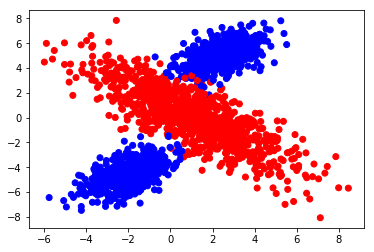

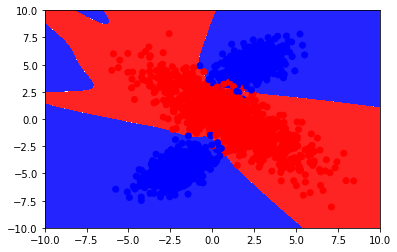

In [266]:
#1. Load data
X = np.genfromtxt('DATA/data_nonLinearX.csv', delimiter=',') #https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html
y = np.genfromtxt('DATA/data_nonLinearY.csv', delimiter=',').astype(np.int64)

        
# 2. plot data
print("Inital Data Points")
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr) #http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
plt.show()

input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
logreg = LogisticRegression(input_dim, output_dim,15)

#logreg = LogisticRegression(input_dim, output_dim, 15)
logreg.fit(X,y,1000, alpha=0.001)
plot_decision_boundary(logreg, X, y)


Decision Bounddary


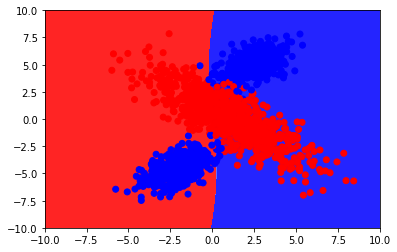

Training Model....
After training:


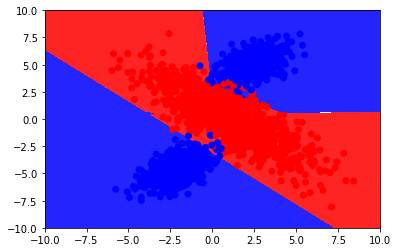

ACCURACY:  0.99
CONFUSION MATRIX: 
 [[ 793.    8.]
 [   8.  791.]]
Decision Bounddary


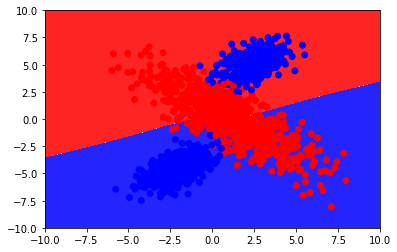

Training Model....
After training:


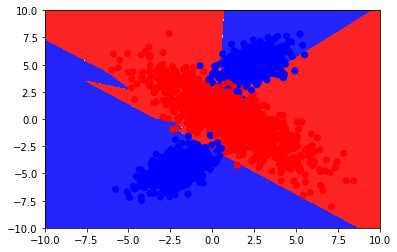

ACCURACY:  0.99125
CONFUSION MATRIX: 
 [[ 805.    8.]
 [   6.  781.]]
Decision Bounddary


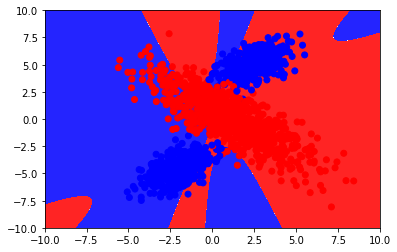

Training Model....
After training:


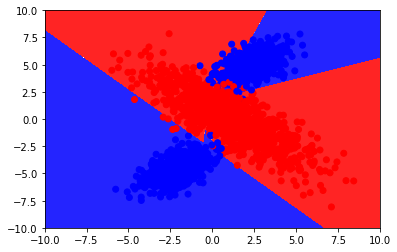

ACCURACY:  0.99125
CONFUSION MATRIX: 
 [[ 795.    8.]
 [   6.  791.]]
Decision Bounddary


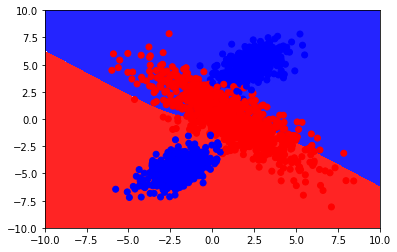

Training Model....
After training:


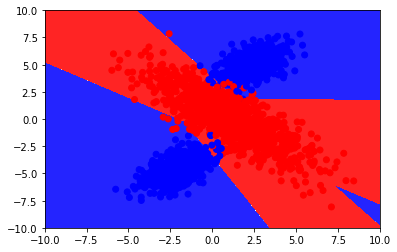

ACCURACY:  0.989375
CONFUSION MATRIX: 
 [[ 774.    8.]
 [   9.  809.]]
Decision Bounddary


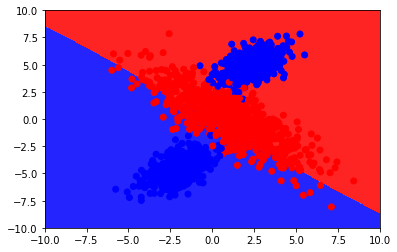

Training Model....
After training:


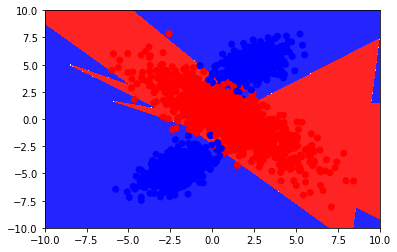

ACCURACY:  0.990625
CONFUSION MATRIX: 
 [[ 797.    8.]
 [   7.  788.]]


In [267]:
#Cross Validation
cross_validate(X,y)

In [268]:
      
        
##S2 =Self.y - self.output + self.l2 * sum (self.weights1**2)/ 2
